## Przykłady równań w fizyce matematycznej

W fizyce matematycznej istnieje wiele kluczowych równań, które opisują różnorodne zjawiska fizyczne. Poniżej przedstawiono trzy fundamentalne równania wraz z krótkim omówieniem ich znaczenia i zastosowań.

### 1. Równanie falowe

Równanie falowe opisuje propagację fal w różnych ośrodkach. Jego najbardziej ogólna forma w trzech wymiarach to:

$$\nabla^2 u - \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = 0$$

gdzie \(u\) to amplituda fali, \(c\) to prędkość fali w ośrodku, a \(\nabla^2\) to operator Laplace'a. Równanie to ma zastosowanie do fal dźwiękowych, fal elektromagnetycznych, a nawet do niektórych rodzajów fal w ciałach stałych.

### 2. Równanie ciepła

Równanie ciepła opisuje dystrybucję temperatury w danym ośrodku w czasie. Jest ono kluczowe w termodynamice i mechanice płynów. Ma postać:

$$\frac{\partial u}{\partial t} - \alpha \nabla^2 u = 0$$

gdzie \(u\) to temperatura, \(t\) to czas, a \(\alpha\) to współczynnik dyfuzji termicznej charakterystyczny dla danego ośrodka. Równanie to znajduje zastosowanie w wielu dziedzinach inżynierii, od analizy przewodzenia ciepła po modelowanie procesów chemicznych.

### 3. Równanie Schrödingera

Równanie Schrödingera jest fundamentalnym równaniem mechaniki kwantowej i opisuje, jak zmienia się w czasie stan kwantowy systemu. W formie zależnej od czasu prezentuje się następująco:

$$i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi + V \psi$$

gdzie \(i\) to jednostka urojona, \(\hbar\) to zredukowana stała Plancka, \(m\) to masa cząstki, \(\psi\) to funkcja falowa cząstki, a \(V\) to potencjał energetyczny. Równanie to umożliwia obliczenie prawdopodobieństwa znalezienia cząstki kwantowej w danym stanie lub miejscu.


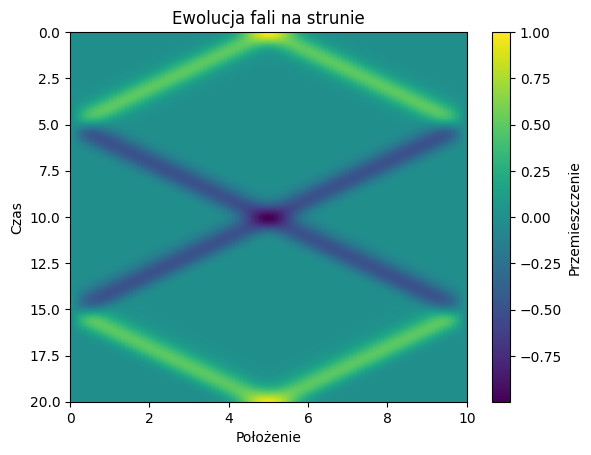

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
L = 10          # Długość struny
c = 1           # Prędkość fali
dx = 0.1        # Krok przestrzenny
dt = 0.005      # Krok czasowy
T = 20           # Całkowity czas symulacji

# Stabilność i liczba Couranta
sigma = c * dt / dx

# Siatka przestrzenna i czasowa
x = np.arange(0, L + dx, dx)
t = np.arange(0, T + dt, dt)
N = len(x)
M = len(t)

# Warunki początkowe (Gauss)
u0 = np.exp(-((x - L / 2) ** 2) / 0.5)

# Inicjalizacja macierzy u
u = np.zeros((M, N))

# Ustawienie warunków początkowych
u[0, :] = u0

# Rozwiązanie równania falowego metodą różnic skończonych
for n in range(0, M - 1):
    for j in range(1, N - 1):
        if n == 0:  # Pierwszy krok czasowy, używamy warunków początkowych
            u[n + 1, j] = u[n, j] + 0.5 * sigma ** 2 * (u[n, j + 1] - 2 * u[n, j] + u[n, j - 1])
        else:
            u[n + 1, j] = 2 * u[n, j] - u[n - 1, j] + sigma ** 2 * (u[n, j + 1] - 2 * u[n, j] + u[n, j - 1])

# Wizualizacja
plt.imshow(u, extent=[0, L, T, 0], aspect='auto')
plt.colorbar(label='Przemieszczenie')
plt.xlabel('Położenie')
plt.ylabel('Czas')
plt.title('Ewolucja fali na strunie')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametry
L = 10          # Długość struny
c = 1           # Prędkość fali
dx = 0.1        # Krok przestrzenny
dt = 0.005      # Krok czasowy
T = 20           # Całkowity czas symulacji

# Stabilność i liczba Couranta
sigma = c * dt / dx

# Siatka przestrzenna i czasowa
x = np.arange(0, L + dx, dx)
N = len(x)

# Warunki początkowe (Gauss)
u = np.exp(-((x - L / 2) ** 2) / 0.5)
u_prev = np.copy(u)  # u w chwili n-1
u_next = np.zeros(N)  # u w chwili n+1

# Inicjalizacja wykresu
fig, ax = plt.subplots()
line, = ax.plot(x, u, 'r-')
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel('Położenie')
ax.set_ylabel('Przemieszczenie')

# Funkcja aktualizująca w każdym kroku animacji
def update(frame):
    global u, u_prev, u_next
    
    # Zastosowanie warunków brzegowych Dirichleta (u=0 na końcach struny)
    u_next[0] = u_next[-1] = 0
    
    # Równanie falowe rozwiązane metodą różnic skończonych
    for j in range(1, N - 1):
        u_next[j] = 2 * u[j] - u_prev[j] + sigma ** 2 * (u[j + 1] - 2 * u[j] + u[j - 1])
    
    u_prev = np.copy(u)
    u = np.copy(u_next)
    line.set_ydata(u)
    return line,

# Stworzenie animacji
ani = FuncAnimation(fig, update, frames=np.arange(0, T, dt), blit=True)

ani.save('animacja.mp4', writer='ffmpeg', fps=60)

